In [7]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(stringr))
library(ggrepel)
library(reshape2)
library(rstatix)
library(ggpubr)
library(destiny)
set.seed(123)


In [2]:
meta_data<- read.csv('/home//workspace/private/bri_figure_all_files_test/jupyter/BRI_Figures_Final_V2/Dataset/scRNA_meta_data-2024-05-09.csv')

# IHM Score

In [3]:
IHM<-read.csv('IHM_Score.csv')%>% select(sample.sampleKitGuid,surrogate.score)
colnames(IHM)[2]<-"IHM_Score"
IHM<-IHM[!duplicated(IHM$sample.sampleKitGuid),]

# IMM-Age

In [5]:
IMM_Age<-read.csv("/home/workspace/IHA_Review_Analysis/Other_Analysis/05_IMM_Age_Metric/IMM_Age_Score.csv")
IMM_Age<-IMM_Age %>% select(SampleID,IMM_Age_Score)

Warning message in file(file, "rt"):
“cannot open file '/home//workspace/IHA_Review_Analysis/Other_Analysis/05_IMM_Age_Metric/IMM_Age_Score.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


# Celltype specific RNA Metric Score (AIFI)

In [ ]:
composite_score_down<-read.csv('/home//workspace/private/bri_figure_all_files_test/jupyter/BRI_Figures_Final_V2/Figure1/04_CompositeScore/BRI_CompositeScore_Down.csv')%>% select(sample.sampleKitGuid,composite_score_sum_scaled_mean,celltype	)
composite_score_up<-read.csv('/home//workspace/private/bri_figure_all_files_test/jupyter/BRI_Figures_Final_V2/Figure1/04_CompositeScore/BRI_CompositeScore_Up.csv')%>% select(sample.sampleKitGuid,composite_score_sum_scaled_mean,celltype	)

In [ ]:
colnames(composite_score_down)[2]<-'Composite_Score_Down'
colnames(composite_score_up)[2]<-'Composite_Score_Up'

# Combine them

In [ ]:
df_combined<-left_join(composite_score_down,composite_score_up )

In [ ]:
df_combined<-left_join(df_combined,IMM_Age,by=c("sample.sampleKitGuid"="SampleID"))
df_combined<-left_join(df_combined,IHM,by=c("sample.sampleKitGuid"="sample.sampleKitGuid"))

In [6]:
df_combined<-df_combined %>% select(sample.sampleKitGuid,celltype,Composite_Score_Down,Composite_Score_Up,IMM_Age_Score,IHM_Score)

ERROR: Error: object 'df_combined' not found


In [12]:
df_combined<-left_join(df_combined,meta_data,by=c("sample.sampleKitGuid"="sample.sampleKitGuid"))

In [13]:
colnames(df_combined)

[1] "sample.sampleKitGuid"                     
 [2] "celltype"                                 
 [3] "Composite_Score_Down"                     
 [4] "Composite_Score_Up"                       
 [5] "IMM_Age_Score"                            
 [6] "IHM_Score"                                
 [7] "X"                                        
 [8] "Unnamed..0"                               
 [9] "lastUpdated"                              
[10] "sample.id"                                
[11] "sample.bridgingControl"                   
[12] "sample.visitName"                         
[13] "sample.visitDetails"                      
[14] "sample.drawDate"                          
[15] "sample.daysSinceFirstVisit"               
[16] "file.id"                                  
[17] "file.name"                                
[18] "file.batchID"                             
[19] "file.panel"                               
[20] "file.pool"                                
[21] "file.fileType"                            
[22] "file.majorVersion"                        
[23] "subject.id"                               
[24] "subject.biologicalSex"                    
[25] "subject.birthYear"                        
[26] "subject.ethnicity"                        
[27] "subject.partnerCode"                      
[28] "subject.race"                             
[29] "subject.subjectGuid"                      
[30] "cohort.cohortGuid"                        
[31] "sample.diseaseStatesRecordedAtVisit"      
[32] "pbmc_sample_id"                           
[33] "subject.covidVaxDose1.daysSinceFirstVisit"
[34] "subject.covidVaxDose2.daysSinceFirstVisit"
[35] "Covid_exclusion"                          
[36] "subjectGuid"                              
[37] "CMV"

In [14]:
add_spearman_correlation <- function(data, mapping, ...) {
  x <- eval_tidy(mapping$x, data)
  y <- eval_tidy(mapping$y, data)
  cor_test <- cor.test(x, y, method = "spearman")
  label <- paste0("rho = ", round(cor_test$estimate, 2), "\np = ", format.pval(cor_test$p.value, digits = 2))
  ggplot2::annotate("text", x = -Inf, y = Inf, label = label, hjust = -0.1, vjust = 1.1, size = 2.5, ...)
}

`geom_smooth()` using formula = 'y ~ x'


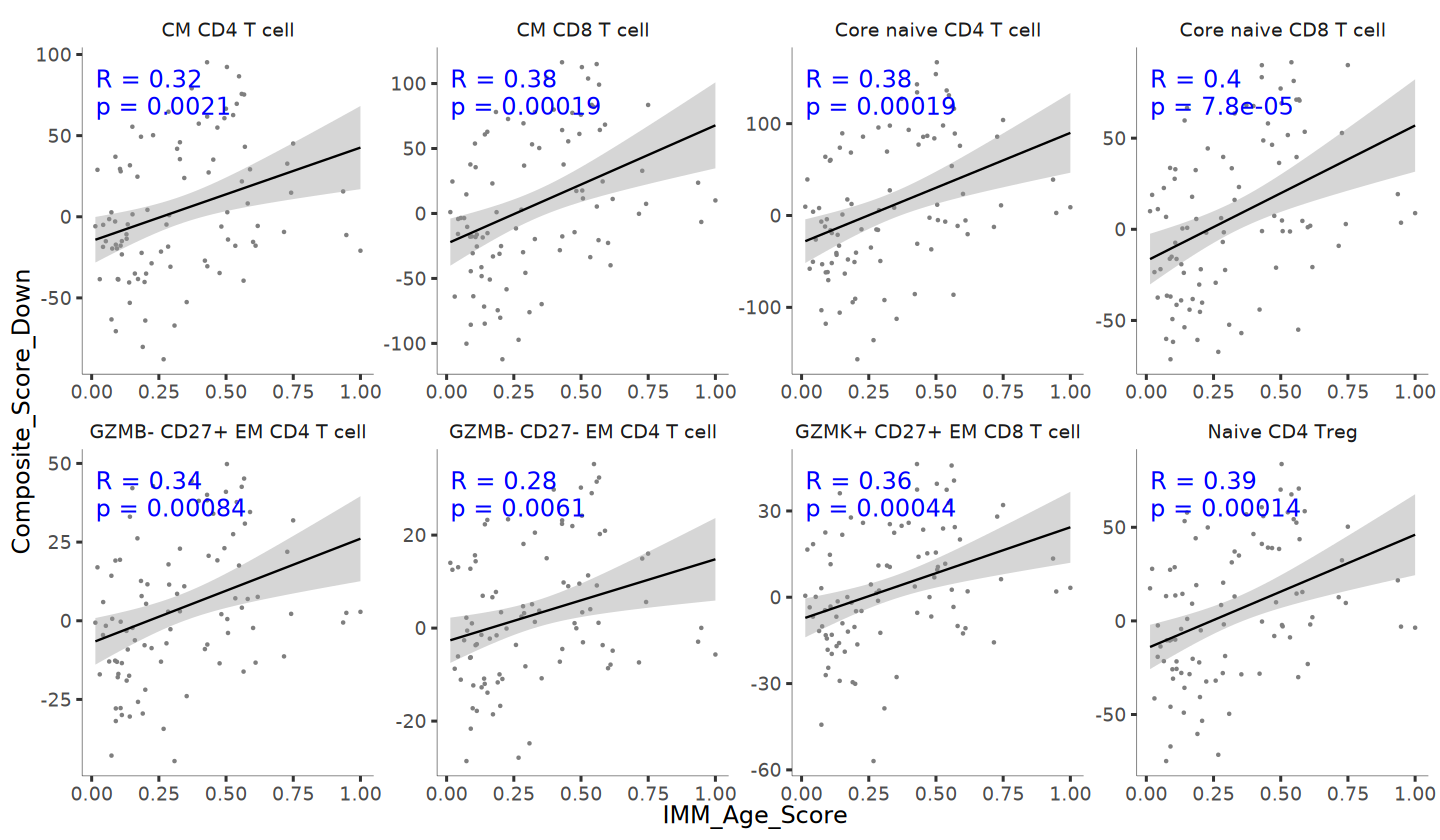

In [21]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(data = df_combined %>% filter(sample.visitName=="Flu Year 1 Day 0"), aes(x = IMM_Age_Score, 
                                                                                     y = Composite_Score_Down)) + 
  geom_point(size=1, stroke=0, aes(color=`cohort.cohortGuid`	)) +
  theme_classic(base_size=14) +
  geom_smooth(method=lm , color="black", linewidth=0.5,  se=TRUE) +    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+

  theme(
    axis.line = element_line(colour = "black", linewidth = 0.1),
    legend.position = "top",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    strip.background = element_rect(linewidth = 0),
    axis.title.x = element_text(margin = margin(t = 1))
  ) +
  facet_wrap(~celltype,  scales='free',ncol=4) +
  stat_cor(aes(label = ..r.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top') +
  stat_cor(aes(label = ..p.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top', vjust = 2.5)


`geom_smooth()` using formula = 'y ~ x'


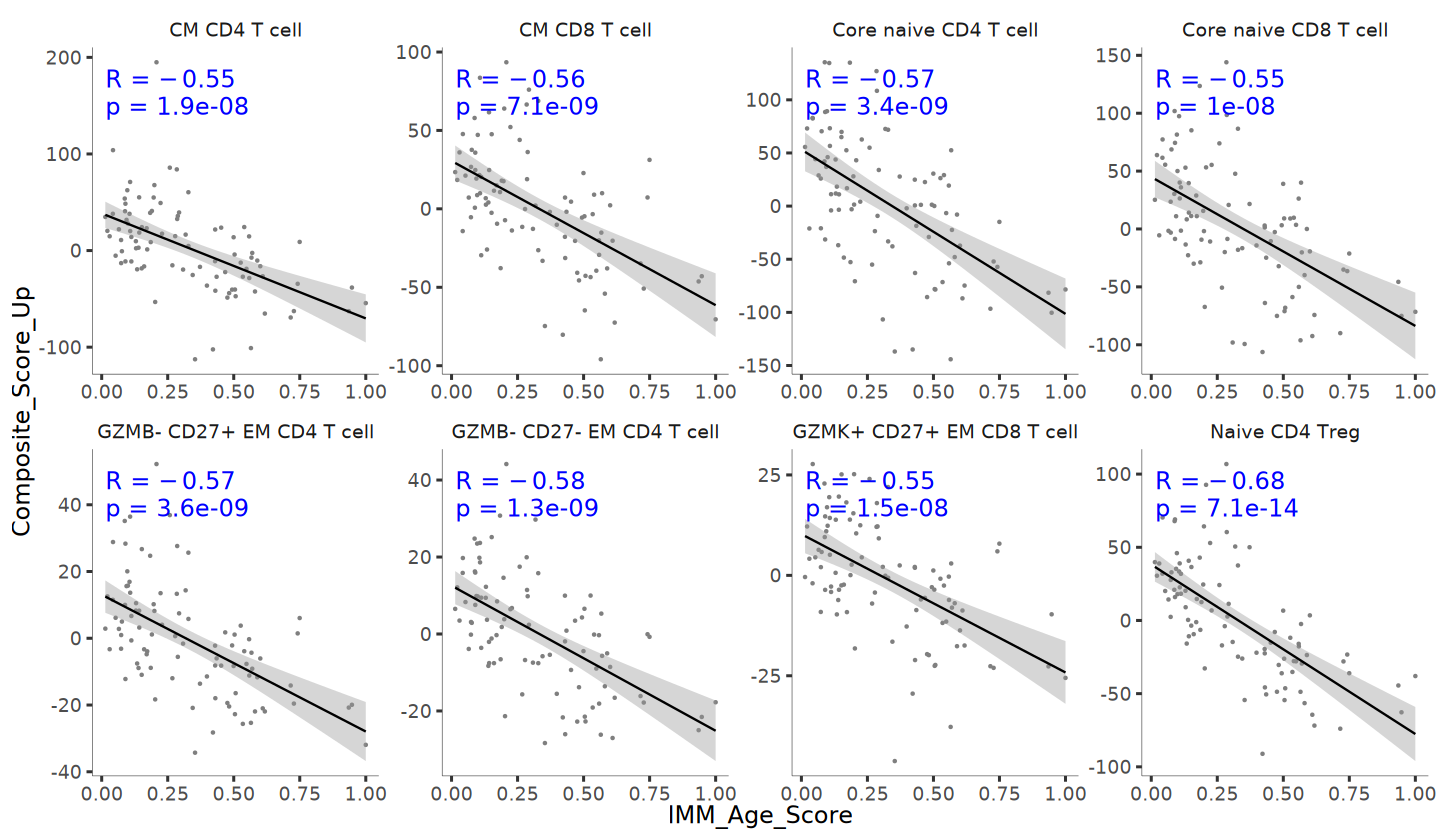

In [22]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(data = df_combined %>% filter(sample.visitName=="Flu Year 1 Day 0"), aes(x = IMM_Age_Score, 
                                                                                     y = Composite_Score_Up)) + 
  geom_point(size=1, stroke=0, aes(color=`cohort.cohortGuid`	)) +
  theme_classic(base_size=14) +
  geom_smooth(method=lm , color="black", linewidth=0.5,  se=TRUE) +    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+

  theme(
    axis.line = element_line(colour = "black", linewidth = 0.1),
    legend.position = "top",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    strip.background = element_rect(linewidth = 0),
    axis.title.x = element_text(margin = margin(t = 1))
  ) +
  facet_wrap(~celltype,  scales='free',ncol=4) +
  stat_cor(aes(label = ..r.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top') +
  stat_cor(aes(label = ..p.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top', vjust = 2.5)


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


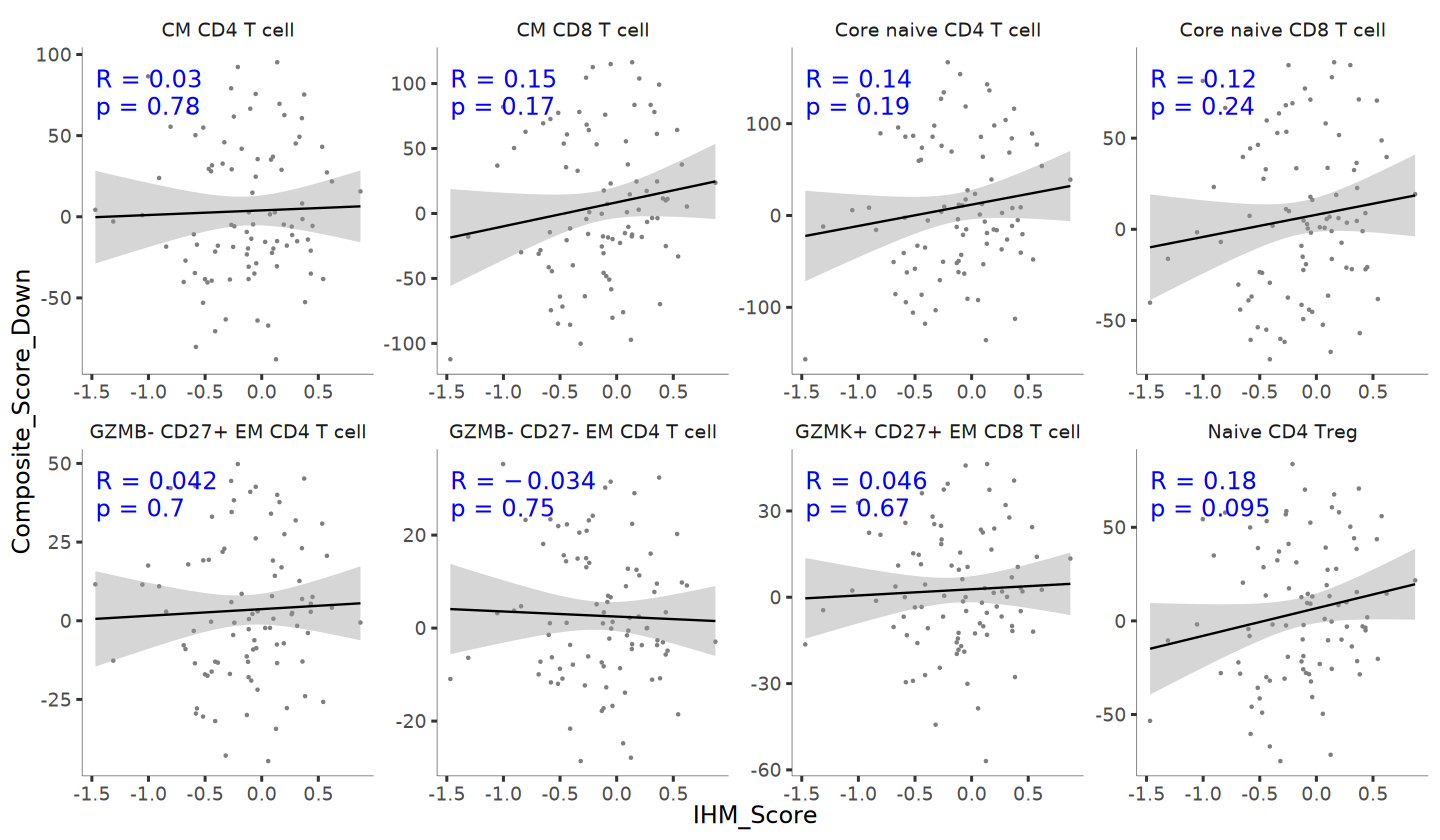

In [23]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(data = df_combined %>% filter(sample.visitName=="Flu Year 1 Day 0",subject.subjectGuid!="BR1013"), aes(x = IHM_Score, 
                                                                                     y = Composite_Score_Down))+ 
  geom_point(size=1, stroke=0, aes(color=`cohort.cohortGuid`	)) +
  theme_classic(base_size=14) +
  geom_smooth(method=lm , color="black", linewidth=0.5,  se=TRUE) +    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+

  theme(
    axis.line = element_line(colour = "black", linewidth = 0.1),
    legend.position = "top",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    strip.background = element_rect(linewidth = 0),
    axis.title.x = element_text(margin = margin(t = 1))
  ) +
  facet_wrap(~celltype,  scales='free',ncol=4) +
  stat_cor(aes(label = ..r.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top') +
  stat_cor(aes(label = ..p.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top', vjust = 2.5)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 8 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_point()`).”


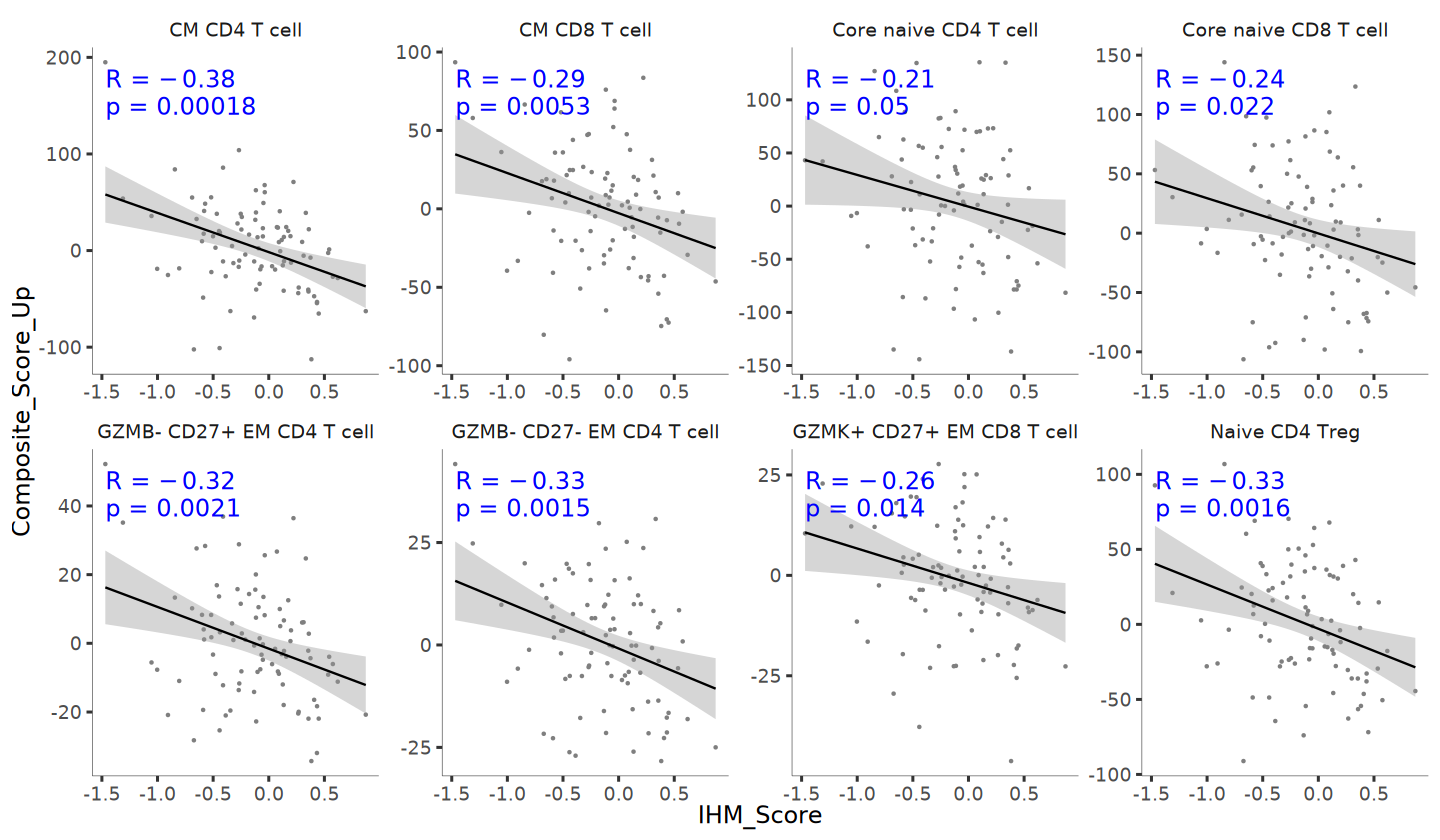

In [24]:
options(repr.plot.width = 12, repr.plot.height = 7)

ggplot(data = df_combined %>% filter(sample.visitName=="Flu Year 1 Day 0",subject.subjectGuid!="BR1013"), aes(x = IHM_Score, 
                                                                                     y = Composite_Score_Up))+ 
  geom_point(size=1, stroke=0, aes(color=`cohort.cohortGuid`	)) +
  theme_classic(base_size=14) +
  geom_smooth(method=lm , color="black", linewidth=0.5,  se=TRUE) +    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+

  theme(
    axis.line = element_line(colour = "black", linewidth = 0.1),
    legend.position = "top",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    strip.background = element_rect(linewidth = 0),
    axis.title.x = element_text(margin = margin(t = 1))
  ) +
  facet_wrap(~celltype,  scales='free',ncol=4) +
  stat_cor(aes(label = ..r.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top') +
  stat_cor(aes(label = ..p.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top', vjust = 2.5)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


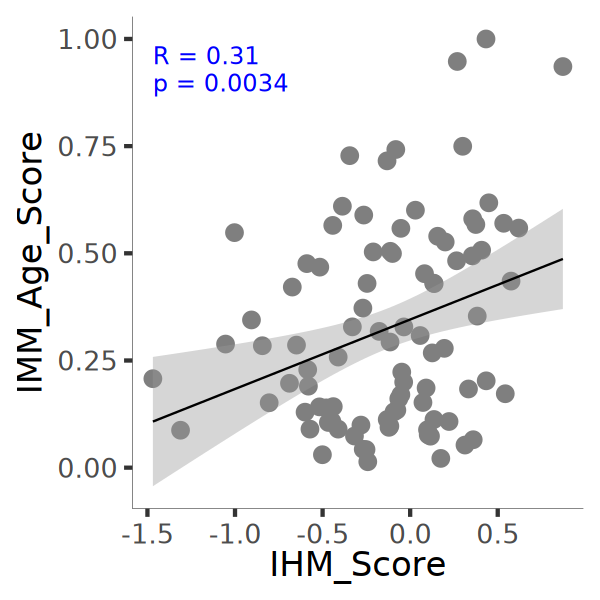

In [19]:
options(repr.plot.width = 5, repr.plot.height = 5)

ggplot(data = df_combined %>% filter(sample.visitName=="Flu Year 1 Day 0",subject.subjectGuid!="BR1013",celltype=="CM CD4 T cell"), 
       aes(x = IHM_Score, y = IMM_Age_Score)) + 
  geom_point(size=5, stroke=0, aes(color=`cohort.cohortGuid`	)) +
  theme_classic(base_size=20) +
  geom_smooth(method=lm , color="black", linewidth=0.5,  se=TRUE) +    scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f'))+

  theme(
    axis.line = element_line(colour = "black", linewidth = 0.1),
    legend.position = "top",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    strip.background = element_rect(linewidth = 0),
    axis.title.x = element_text(margin = margin(t = 1))
  ) +
  stat_cor(aes(label = ..r.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top') +
  stat_cor(aes(label = ..p.label..), method = "pearson", size = 5, label.x.npc = 'left', color='blue',label.y.npc = 'top', vjust = 2.5)


# Boxplot

In [21]:
df_combined_subset<- df_combined %>% filter(sample.visitName=="Flu Year 1 Day 0",celltype=="CM CD4 T cell")

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


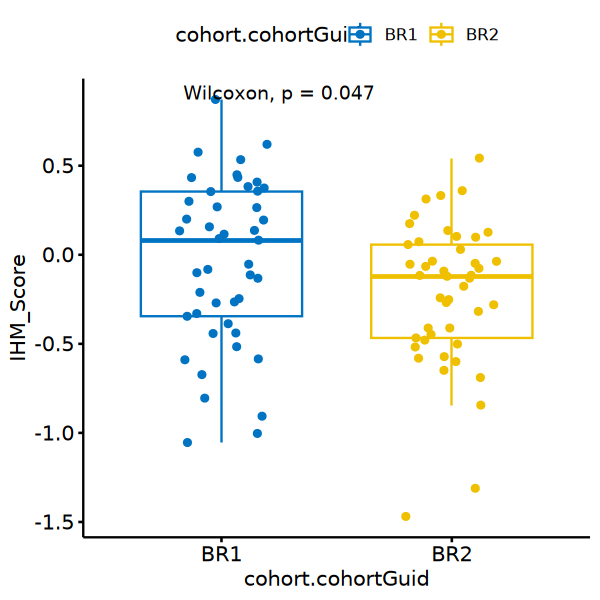

In [22]:
p <- ggboxplot(df_combined_subset %>% filter(subject.subjectGuid!="BR1013"), x = "cohort.cohortGuid", y = "IHM_Score",
          color = "cohort.cohortGuid", palette = "jco",
          add = "jitter")
#  Add p-value
p + stat_compare_means()

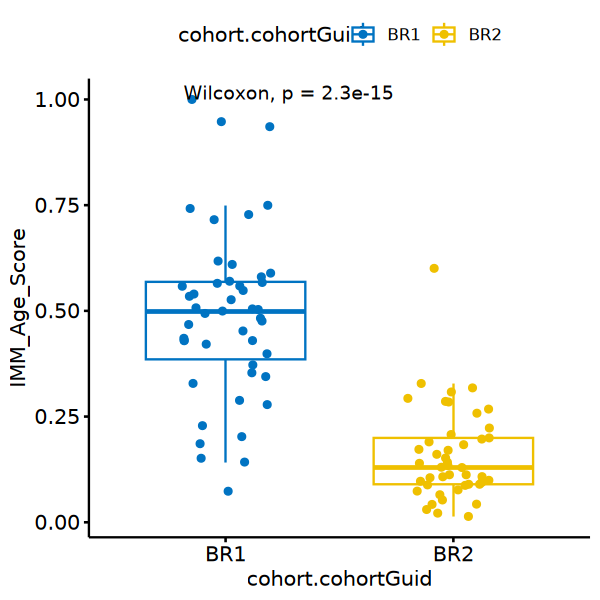

In [23]:
p <- ggboxplot(df_combined_subset, x = "cohort.cohortGuid", y = "IMM_Age_Score",
          color = "cohort.cohortGuid", palette = "jco",
          add = "jitter")
#  Add p-value

p + stat_compare_means()